In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from dateutil.relativedelta import relativedelta

In [4]:
starbucks_stocks = pd.read_csv('starbucks.csv', index_col='Date', parse_dates=True)

In [5]:
starbucks_stocks.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [6]:
starbucks_stocks.index

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=1006, freq=None)

In [7]:
print(starbucks_stocks.index[3]-starbucks_stocks.index[2])

1 days 00:00:00


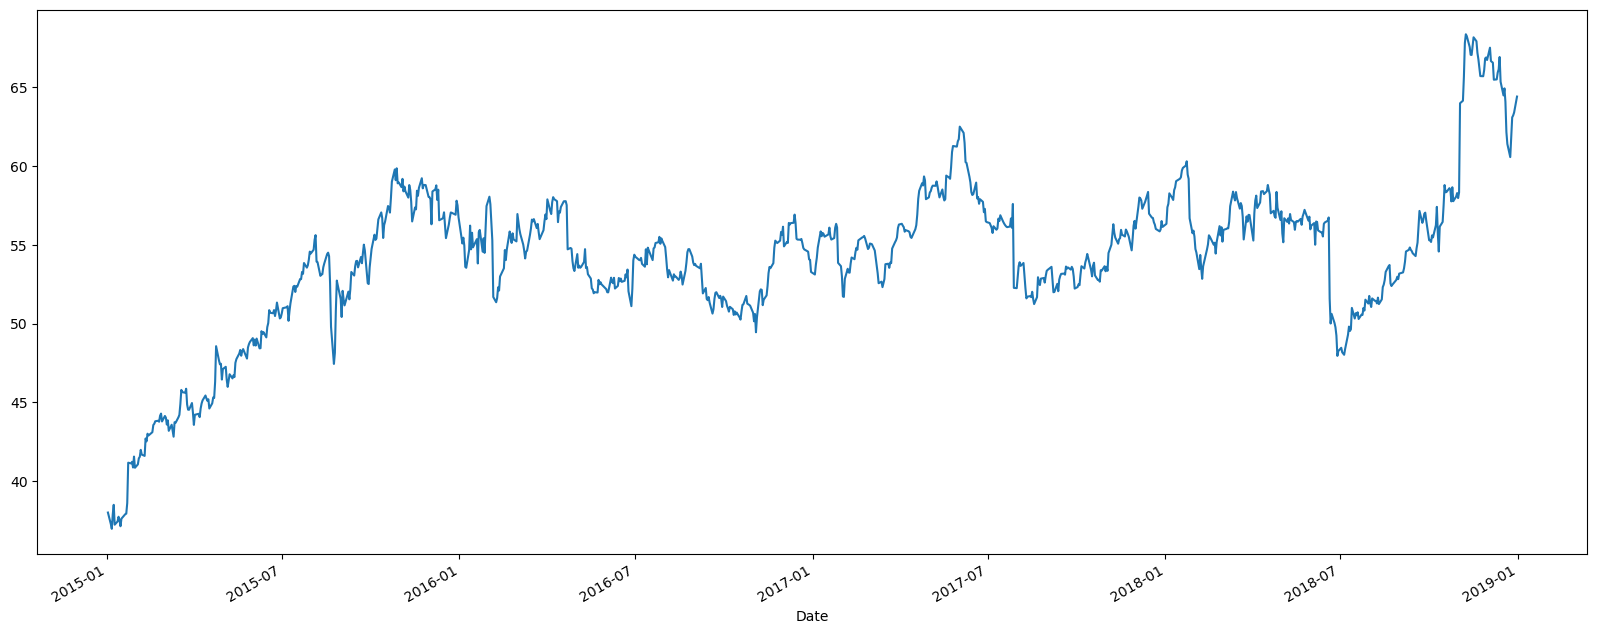

In [8]:
# Time plot of Starbucks stocks closing price
starbucks_stocks['Close'].plot(figsize=(20, 8));

In [9]:
airline_passengers = pd.read_csv('airline_passengers.csv', index_col='Month', parse_dates=True)

In [10]:
airline_passengers.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


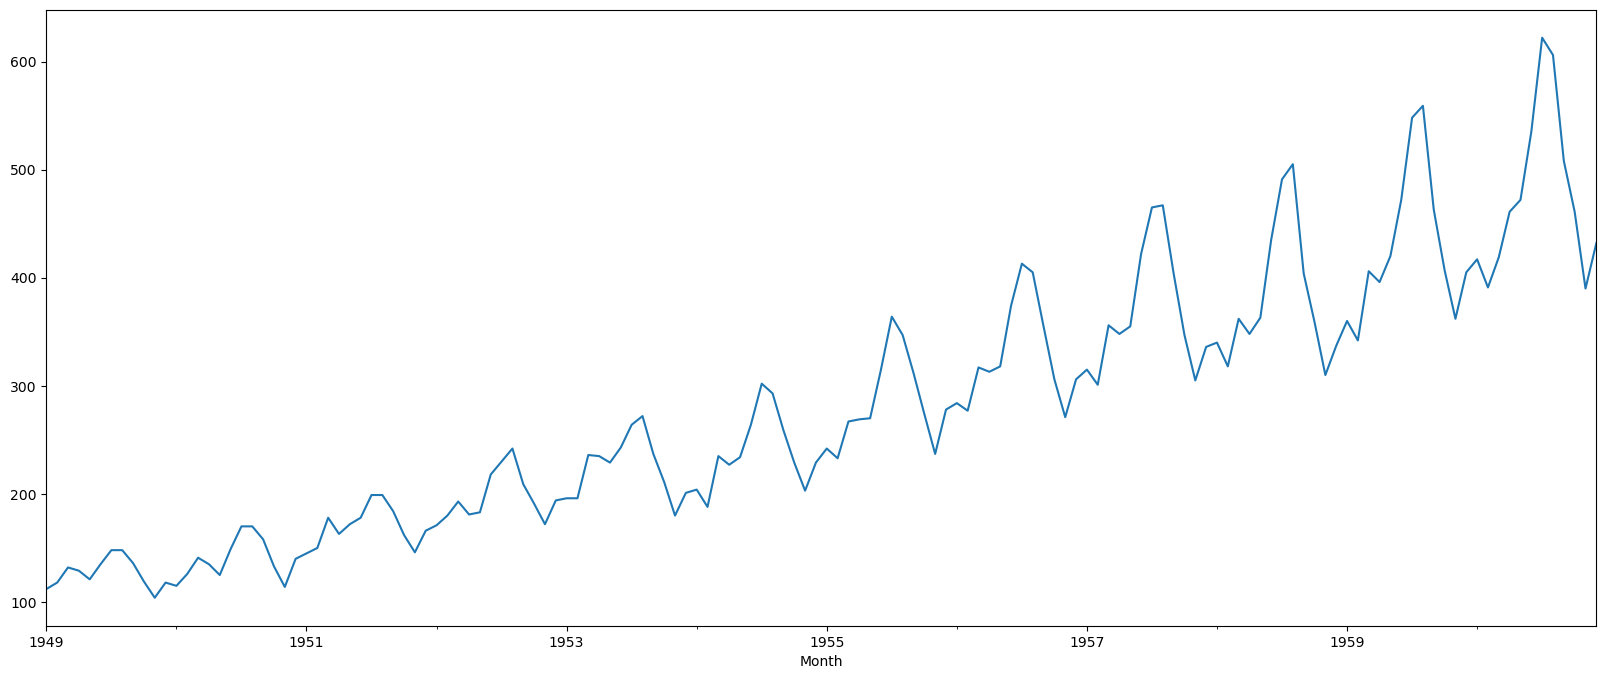

In [11]:
airline_passengers['Passengers'].plot(figsize=(20, 8));

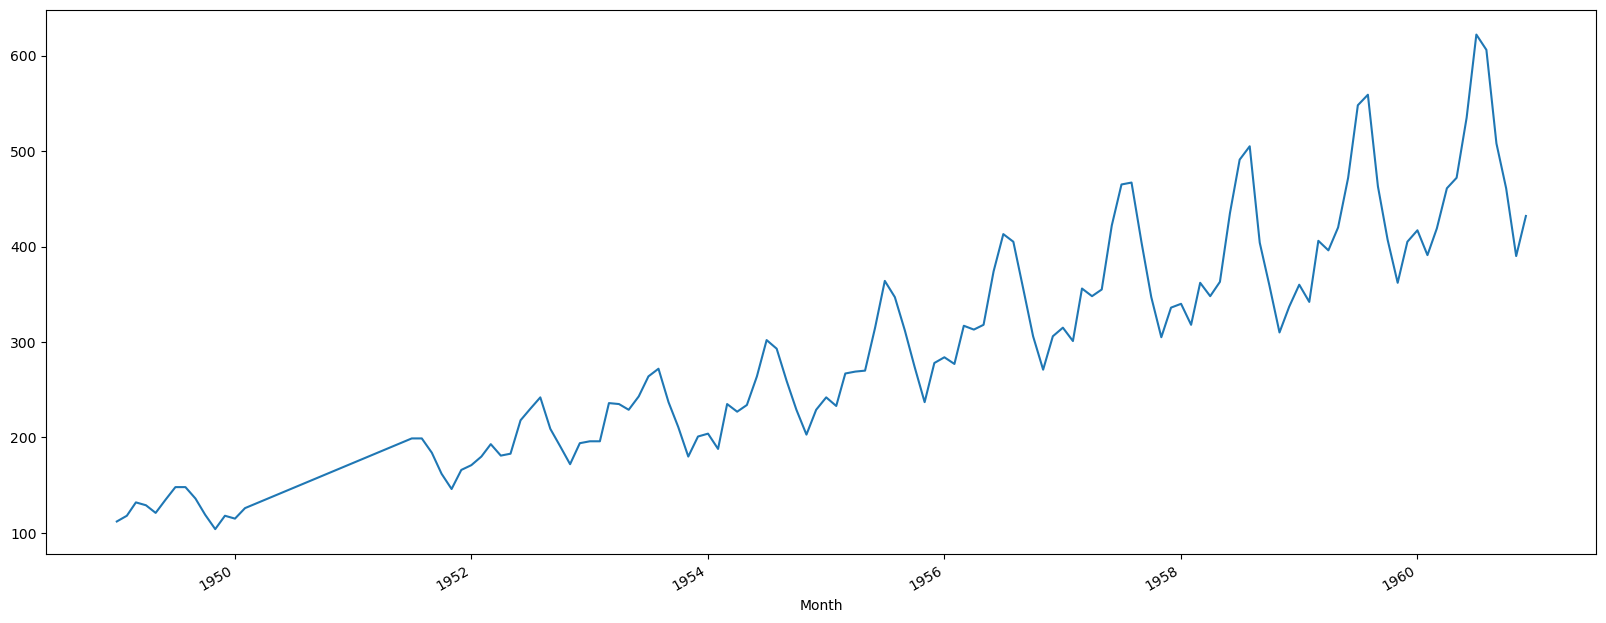

In [12]:
# In the following data set some rows are deleted, i.e. they are not set to NA but the entries are simply removed from the dataset.
airline_passengers2 = pd.read_csv('airline_passengers_missingrows.csv', index_col='Month', parse_dates=True)
# pd.plot simply draws a line between subsequent observations, whether there are missing months between them or not. -> Careful when examining 
# a yet unknown time series via pd.plot()
airline_passengers2['Passengers'].plot(figsize=(20, 8));

In [13]:
# See for which months there are data entries
airline_passengers2.index[airline_passengers2.index.year < 1952]

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01', '1949-11-01', '1949-12-01',
               '1950-01-01', '1950-02-01', '1951-07-01', '1951-08-01',
               '1951-09-01', '1951-10-01', '1951-11-01', '1951-12-01'],
              dtype='datetime64[ns]', name='Month', freq=None)

In [14]:
# insert rows for the missing months manually
# create variables with start and end date of series
start = airline_passengers2.index[0].date()
end = airline_passengers2.index[len(airline_passengers2)-1].date()

# create a series of months from the start date of the series to the end date (freq='MS' means start of the month, 'M' would give end of month)
# See here for a list of frequency aliases in panda: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offset-aliases
new_dates = pd.date_range(start=start,end=end,freq='MS') # this gives us our new index
print(new_dates)

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', length=144, freq='MS')


In [15]:
# overwrite the index to also include the dates for which no info is available.
airline_passengers2 = airline_passengers2.reindex(new_dates)
print(airline_passengers2['Passengers'][airline_passengers2.index.year < 1952])

1949-01-01    112.0
1949-02-01    118.0
1949-03-01    132.0
1949-04-01    129.0
1949-05-01    121.0
1949-06-01    135.0
1949-07-01    148.0
1949-08-01    148.0
1949-09-01    136.0
1949-10-01    119.0
1949-11-01    104.0
1949-12-01    118.0
1950-01-01    115.0
1950-02-01    126.0
1950-03-01      NaN
1950-04-01      NaN
1950-05-01      NaN
1950-06-01      NaN
1950-07-01      NaN
1950-08-01      NaN
1950-09-01      NaN
1950-10-01      NaN
1950-11-01      NaN
1950-12-01      NaN
1951-01-01      NaN
1951-02-01      NaN
1951-03-01      NaN
1951-04-01      NaN
1951-05-01      NaN
1951-06-01      NaN
1951-07-01    199.0
1951-08-01    199.0
1951-09-01    184.0
1951-10-01    162.0
1951-11-01    146.0
1951-12-01    166.0
Freq: MS, Name: Passengers, dtype: float64


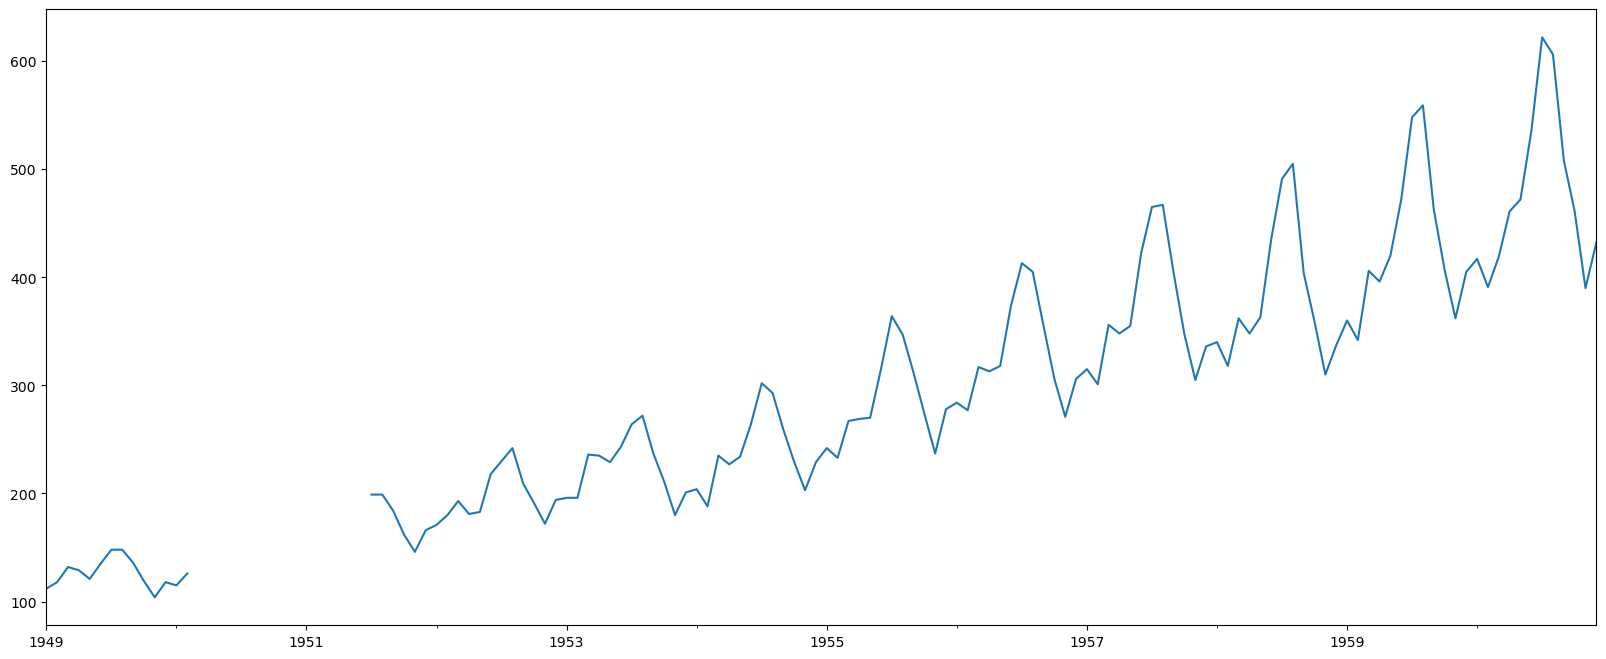

In [16]:
airline_passengers2['Passengers'].plot(figsize=(20, 8));

In [17]:
sp500_close = pd.read_csv('sp500_close.csv', index_col=0, parse_dates=True)
sp500_close.head()

,AAL,AAPL,AAP,ABBV,ABC,ABT,ACN,ADBE,ADI,ADM,...,XLNX,XL,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
2013-02-08,14.75,67.8542,78.90,36.25,46.89,34.41,73.31,39.12,45.70,30.22,...,37.51,28.24,88.61,42.87,31.84,27.09,65.30,75.85,24.14,33.05
2013-02-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-02-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-02-11,14.46,68.5614,78.39,35.85,46.76,34.26,73.07,38.64,46.08,30.28,...,37.46,28.31,88.28,42.84,31.96,27.46,64.55,75.65,24.21,33.26
2013-02-12,14.27,66.8428,78.60,35.42,46.96,34.30,73.37,38.89,46.27,30.81,...,37.58,28.41,88.46,42.87,31.84,27.95,64.75,75.44,24.49,33.74


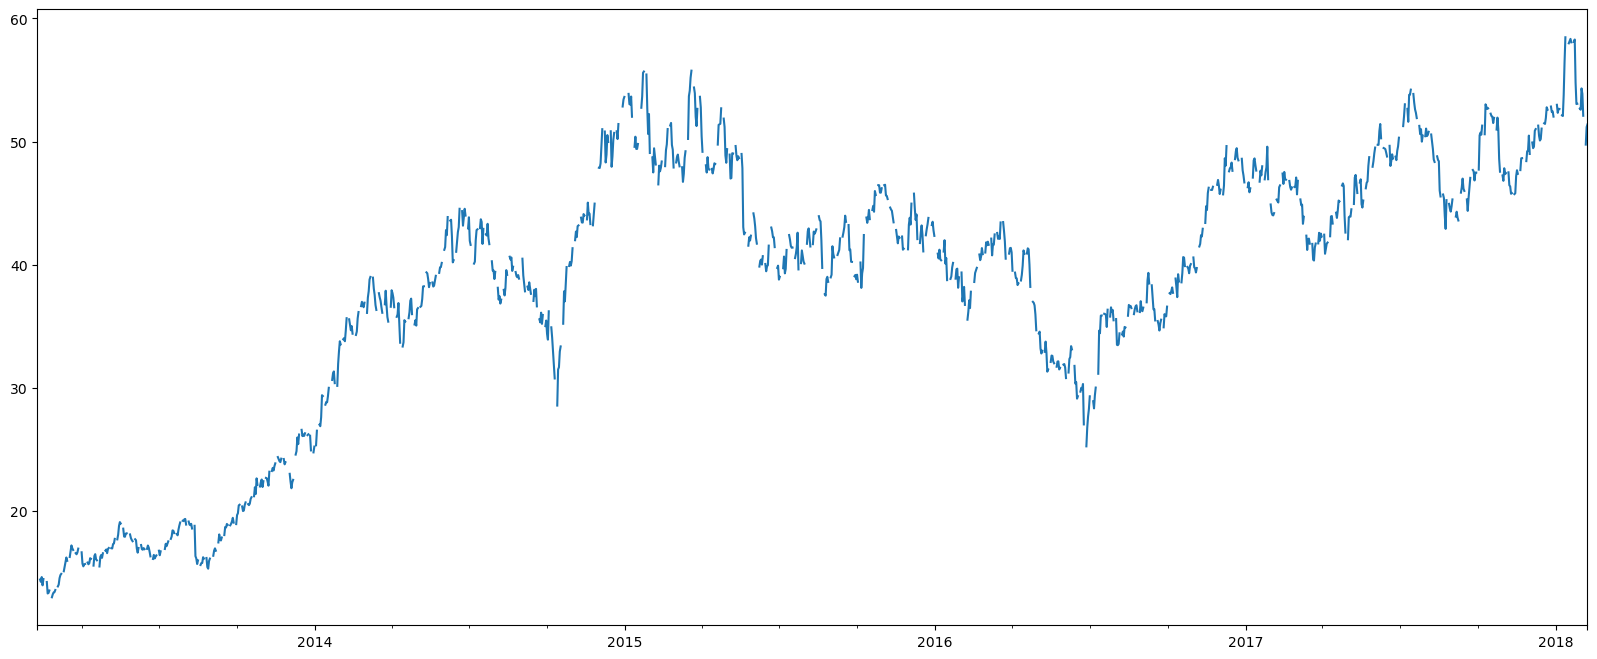

In [18]:
# As the stock market is closed on Saturday, Sunday and holidays,there are no closing prices for these days. Here it doesn't make much sense 
# to plot the rows with missing values
sp500_close['AAL'].plot(figsize=(20, 8));

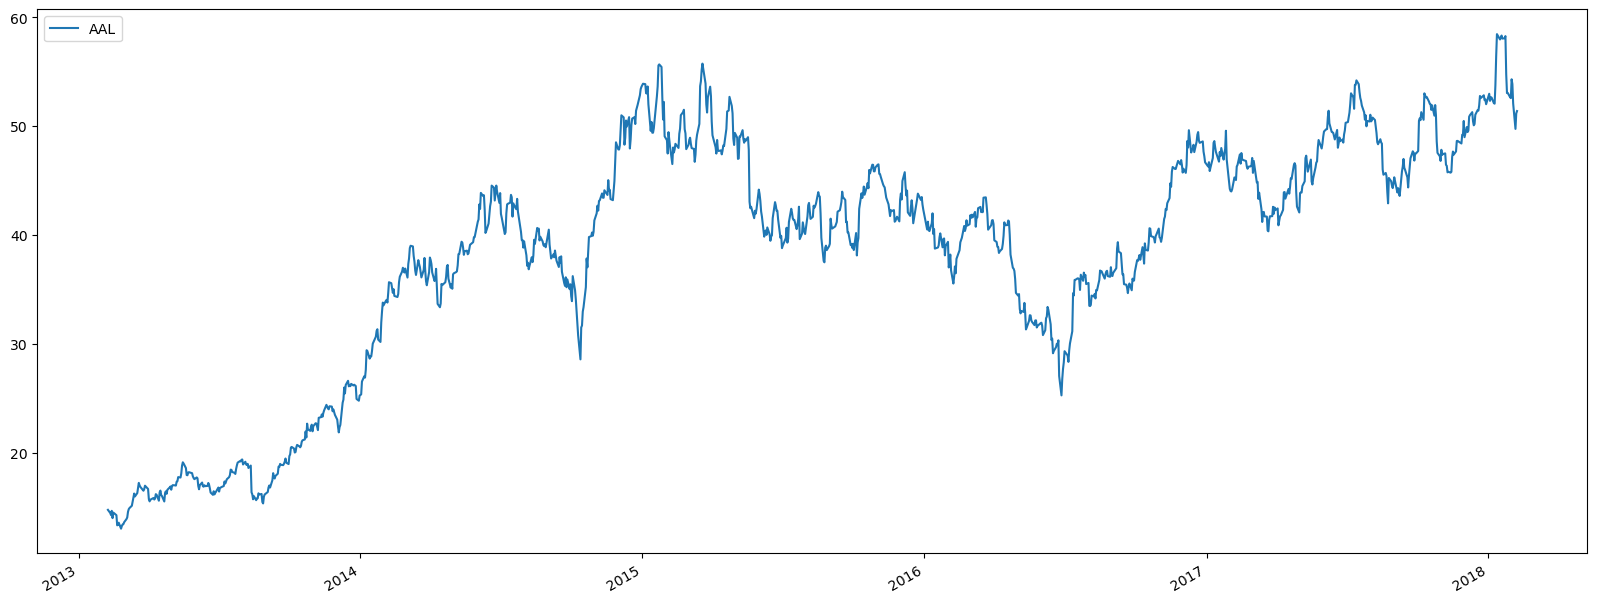

In [19]:
aal = sp500_close[['AAL']].copy().dropna()
aal.plot(figsize=(20, 8));

In [20]:
############ Changing the granularity of a series
starbucks_stocks.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [21]:
# Take the annual mean
starbucks_stocks.resample(rule='A').mean() # 'A' means annual

,Close,Volume
Date,,
2015-12-31,50.078100,8.649190e+06
2016-12-31,53.891732,9.300633e+06
2017-12-31,55.457310,9.296078e+06
2018-12-31,56.870005,1.122883e+07


In [29]:
# Take the weekly mean
starbucks_stocks.resample(rule='W').mean() # 'W' means weekly

,Close,Volume
Date,,
2015-01-04,38.006100,6906098.0
2015-01-11,37.573980,13949588.8
2015-01-18,37.493720,9499875.2
2015-01-25,38.906225,20900684.0
2015-02-01,41.123980,11920780.0
...,...,...
2018-12-09,66.542500,13917364.0
2018-12-16,65.958000,12203624.4
2018-12-23,63.398000,16769296.4


In [23]:
# Define a new function to take the first observation of each period
def first_observation(entry):
    if len(entry):  # handles the case of missing data
        return entry.iloc[0]
# Take the first observation per week
starbucks_stocks.resample(rule='W').apply(first_observation)

,Close,Volume
Date,,
2015-01-04,38.0061,6906098
2015-01-11,37.2781,11623796
2015-01-18,37.4415,10021486
2015-01-25,37.9058,10738304
2015-02-01,41.1235,14098574
...,...,...
2018-12-09,67.5000,13834742
2018-12-16,65.4900,12148308
2018-12-23,64.4700,15143054


In [24]:
temperature = pd.read_csv('temperatures.csv', index_col='time', parse_dates=True)
temperature.head()

,temperature
time,
2018-09-17 00:00:00,79.11
2018-09-17 00:01:00,79.11
2018-09-17 00:02:00,79.11
2018-09-17 00:03:00,79.07
2018-09-17 00:04:00,79.05


In [25]:
temperature.index[3]-temperature.index[2]

Timedelta('0 days 00:01:00')

In [26]:
# Take the first observation in every hour
temperature.resample(rule='h').apply(first_observation)

,temperature
time,
2018-09-17 00:00:00,79.11
2018-09-17 01:00:00,78.82
2018-09-17 02:00:00,78.62
2018-09-17 03:00:00,78.37
2018-09-17 04:00:00,78.13
2018-09-17 05:00:00,77.95
2018-09-17 06:00:00,77.99
2018-09-17 07:00:00,78.19
2018-09-17 08:00:00,78.39
